## Вопрос по выбору: 
   ### "Закон Эйнштейна-Смолоуховсого"
    

##### Цель: 
###### Численно смоделировать расплывание облака идеальных частиц и ислледовать критические параметры при которых облако перестает подчиняться закону Эйнштейна-Смолоуховсого 

##### Закон:
     <r^2> = r0^2 + 6kTBt
     Т.е. Мы же будем исследовать распространение 
     частиц из одной точки (r0 = 0) и при постоянном 
     давлении и вязкости среды. А время будем 
     измерять числом шагов (steps). Длину свободного 
     пробега обозначим за L.
     Итого: <r^2> ~ steps * L^2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Circle

def random_path(N, L, distr='normal', alpha=3.0, M=1.0, t=0):
    #случайные направлния
    v = np.random.normal(size=(2, N))
    nv = v / np.sqrt(np.sum(v**2, 0))# нормировка
    nv /= np.sqrt(M) # скорости частиц примеси
    
    if distr == 'pareto':
        # тяжелый хвост
        steps = L * (np.random.pareto(alpha, N))
    else:
        # нормальное распределение
        steps = np.random.normal(scale=L*np.sqrt(M), size=N)
    if t == 0:
        R = np.cumsum(nv * steps, axis=1)
    else:
        R = np.cumsum(nv / np.random.randint(1, t) * steps, axis=1)
    return R

def modulate(L=1.0, steps=int(1e4), NUM_PATHS=30, distr='normal',
             alpha=3.0, mass=1.0, sub=0):
    R = []
    R0 = np.sqrt(steps) * L # среднеквадратичное смещение
    for i in range(NUM_PATHS):
        R.append(random_path(steps, L, distr, alpha, mass, sub))
    plt.rcParams['figure.figsize'] = [10, 10]
    ax = plt.gca()
    plt.axis('equal')
    ax.add_patch(Circle((0,0), R0, color='black', fill=False))
    #ax.add_patch(Circle((0,0), 20, color='black'))
    for graph in R:
        ax.plot(graph[0], graph[1], '-')
    plt.show()

### 1. Влияние длины свободного пробега (~ температуры):

##### L = 1.0

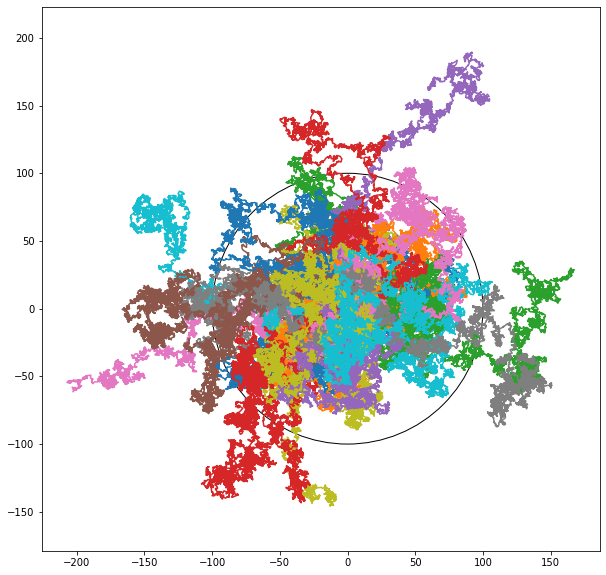

In [16]:
L = 1.0
modulate(L)

##### L = 100000.0

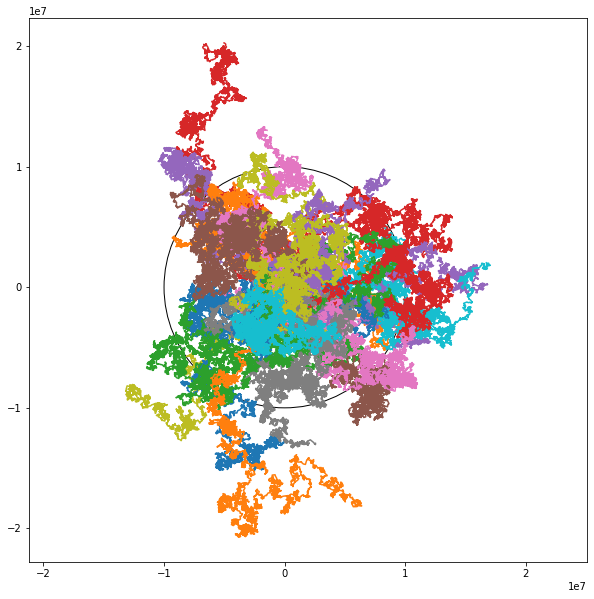

In [17]:
L = 100000.0
modulate(L)

##### L = 0.000001

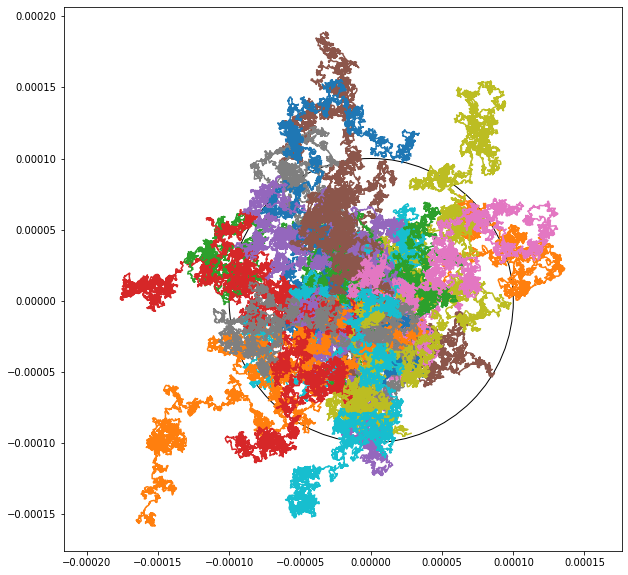

In [18]:
L = 0.000001
modulate(L)

##### Итог: даже при очень малых и очень больших длинах свободного пробега частицы не выходили дальше 2-3 радиусов теоретического круга, то есть закон выполняется

### 2. Влияние числа шагов (~ времени):

##### N = 10

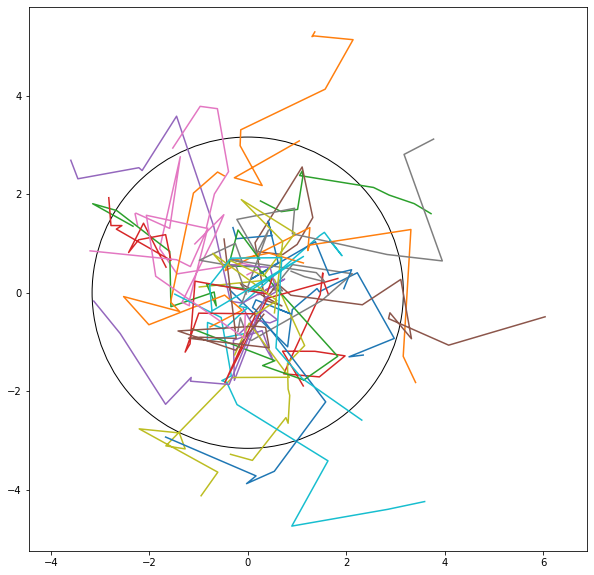

In [19]:
N = int(10)
modulate(steps=N)

##### N = 10^2

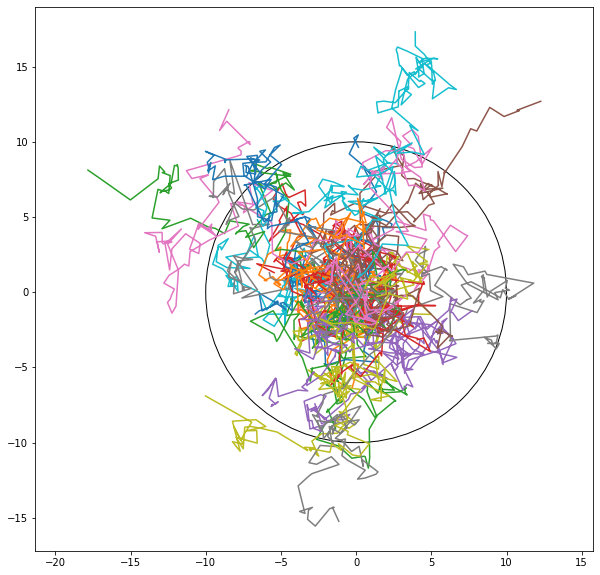

In [20]:
N = int(1e2)
modulate(steps=N)

##### N = 10^6

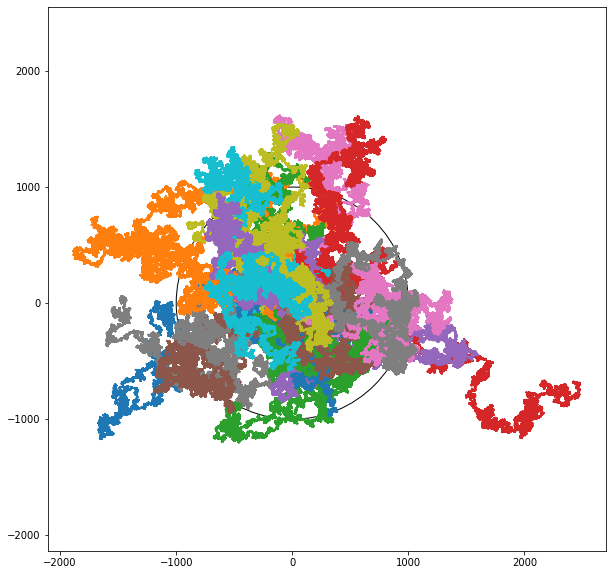

In [21]:
N = int(1e6)
modulate(steps=N)

##### Итог: как при довольно малых, так и при довольно больших временах закон выполняется с очень хорошей точностью 


## Диффузия

### 3. Супердиффузия:

Для моделирования используем распределение Паретто

##### alpha = 2.5

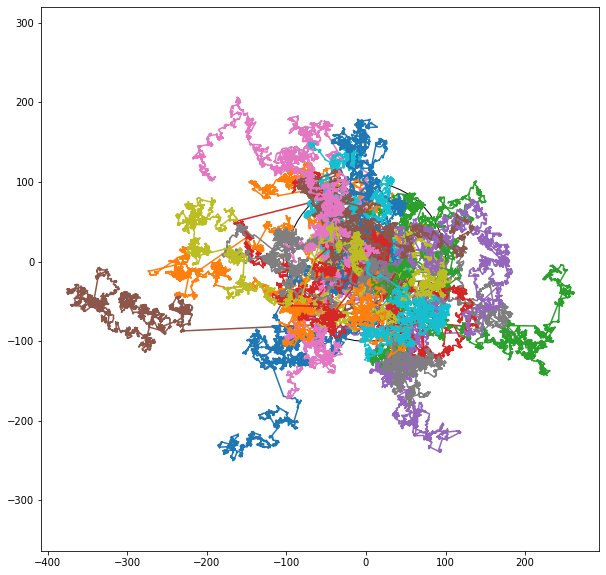

In [22]:
alpha = 2.5
modulate(distr='pareto', alpha=alpha)

##### alpha = 2.0

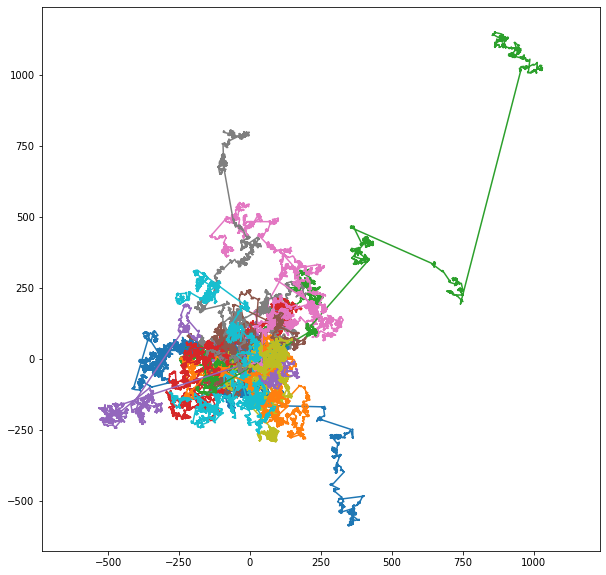

In [23]:
alpha = 2.0
modulate(distr='pareto', alpha=alpha)

##### alpha = 1.5

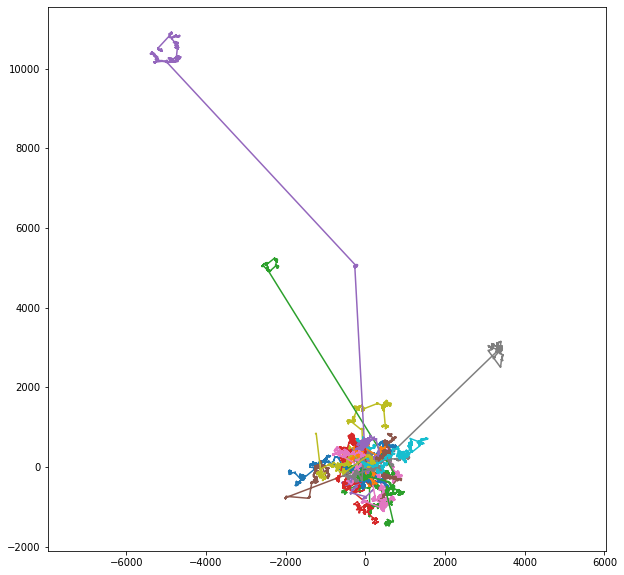

In [24]:
alpha = 1.5
modulate(distr='pareto', alpha=alpha)

### 4. Субдиффузия:

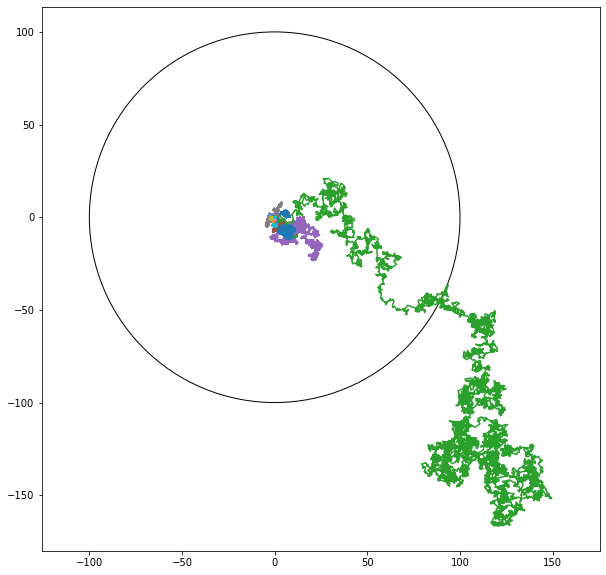

In [25]:
modulate(sub=100)

### 5. Диффузия тяжелой примеси
    <V> = <v> * sqrt(m/M)
    L' ~ L * sqrt(M/m)
    <r^2> ~ L' * <V> * t

##### M/m = 2.0

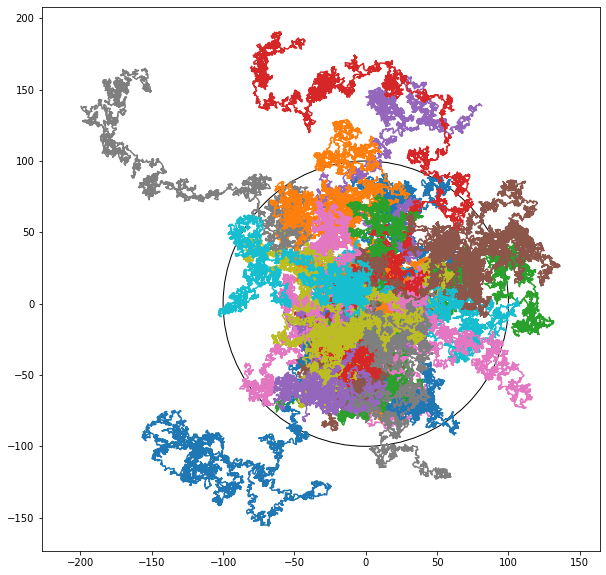

In [26]:
modulate(mass=2.0)

##### M/m = 5.0

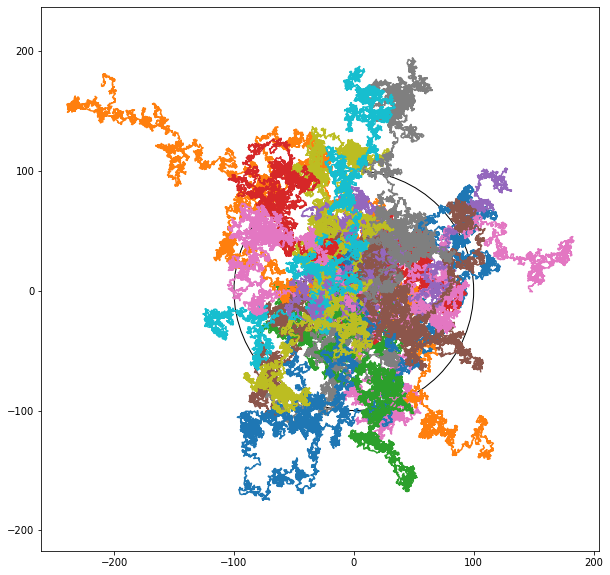

In [27]:
modulate(mass=2.0)

##### M/m = 10.0

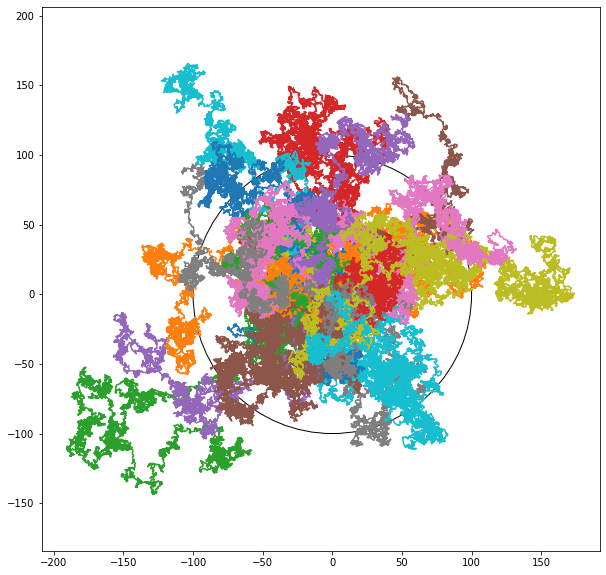

In [28]:
modulate(mass=10.0)

##### Итог: Коэффициент диффузии не зависит от массы частиц примеси